In [1]:
## 특이값 분해 - SVD(Singular Value Decomposition)
# 행렬분해를 통해 잠재요인을 찾아서, 다시 원복시키면 노이즈가 제거된 형태로 재구성 가능

import numpy as np
from numpy.linalg import svd

# 4x4 random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [4]:
# SVD 행렬 분해
U, Sigma, vt = svd(a)
print(U.shape, Sigma.shape, vt.shape)
print('U:', np.round(U, 3))
print()
# 참고로 시그마의 경우 4x4 함수가 맞는데 대각선에만 값이 있어서 저런식으로 표현이 된 것임
print('Sigma:', np.round(Sigma, 3))
print()
print('vt:', np.round(vt, 3))

(4, 4) (4,) (4, 4)
U: [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]

Sigma: [3.423 2.023 0.463 0.079]

vt: [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [5]:
# 분해된 행렬들을 이용해서 다시 원복

# 4x4로 바꿔주고나서 내적을 구한다. 
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [6]:
# 이번엔 데이터 의존도가 높은 데이터 행렬 생성
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [7]:
U, Sigma, vt = svd(a)
print(U.shape, Sigma.shape, vt.shape)
print('U:', np.round(U, 3))
print()
# 참고로 시그마의 경우 4x4 함수가 맞는데 대각선에만 값이 있어서 저런식으로 표현이 된 것임
print('Sigma:', np.round(Sigma, 3))
print()
print('vt:', np.round(vt, 3))

(4, 4) (4,) (4, 4)
U: [[ 0.246  0.583  0.76  -0.15 ]
 [-0.774 -0.017  0.365  0.516]
 [-0.529  0.566 -0.365 -0.516]
 [ 0.246  0.583 -0.395  0.666]]

Sigma: [2.663 0.807 0.    0.   ]

vt: [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.389 -0.784  0.479  0.07 ]
 [-0.6    0.13  -0.376  0.694]]


In [16]:
# 시그마쪽을 보면 앞에 두개만 쓰면 되니까 왼/오도 4x2, 2x2, 2x4로 데이터를 줄여준다
# 이경우엔 아예 0, 0 인 애를 걷었으니 동일한 행렬이 나옴
# 데이터를 적게 넣었는데 같은 값이 나온다
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# 열을 다쓸거면 굳이 열쪽은 뭐 안넣어줘도 된다. 행값만 인덱싱하면 된다. 
vt_ = vt[:2]

print(U_.shape, Sigma_.shape, vt_.shape)
a_ = np.dot(np.dot(U_, Sigma_), vt_)
print(np.round(a,3))



(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [28]:
# Truncated SVD = PCA와 거의 동일한 방식
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬\n', matrix)
print()

# full_matrices=False로 놓으면 앞의 차원과 뒤의 차원이 축소된다. compact하게 svd 수행가능
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('분해 행렬 차원', U.shape, Sigma.shape, Vt.shape)
print('sigma:', Sigma)

# Truncated SVD 수행(4차원으로 줄여보자)
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('sigma_tr:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('복원 행렬:\n', matrix_tr)

원본 행렬
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원 (6, 6) (6,) (6, 6)
sigma: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)
sigma_tr: [0.55463089 0.83865238 0.88116505 3.2535007 ]
복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.479538

Text(0, 0.5, 'T-SVD Comp2')

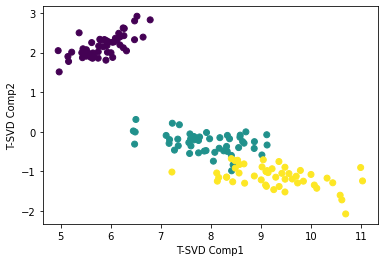

In [32]:
# 사이킷런에서도 Truncated SVD를 지원함!
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c= iris.target)
plt.xlabel('T-SVD Comp1')
plt.ylabel('T-SVD Comp2')


Text(0.5, 1.0, 'PCA')

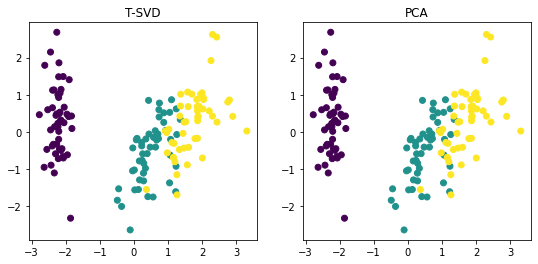

In [35]:
# PCA와의 비교
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)

ax1.set_title('T-SVD')
ax2.set_title('PCA')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Component 2')

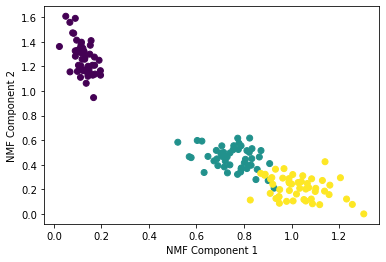

In [39]:
##NMF: non negative matrix factorization
# 원본 행렬 내의 모든 원소값이 모두 양수(0 이상)라는게 보장되면 두개의 기반 양수 행렬로 분해 가능
# 행렬 분해: matrix factorization, SVD와 같은 행렬 분해 기법을 통칭
# 다를건 없고 그냥 모두 양수일경우 활용하는 METHOD 중 하나다 정도만 
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)

nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')


